MODEL PERFORMANCE & ANALYSIS
- F1 Score by p-thresholds
- Feature Importance

In [2]:
import datetime
import os
import pickle
import lightgbm as lgb
import pandas as pd

from common.paths import Paths
from sklearn.metrics import f1_score
import numpy as np

In [3]:
ex = 'ex2022-03-06_165641-ethusd'

In [24]:
with open(os.path.join(Paths.trade_model, ex, 'boosters.p'), 'rb') as f:
    boosters = pickle.load(f)

Feature Importance

In [25]:
from common.utils.util_func import get_model_fscore

importances = [get_model_fscore(booster) for booster in boosters]
res = pd.DataFrame(importances).mean(axis=0).sort_values(ascending=False)

In [26]:
importances

[{'_measurement-order_book|_field-bid_buy_count_net|alpha-0.06451612903225806|asset-ethusd|exchange-bitfinex|information-bid_buy_count_net_imbalance_net_resampled_max|levels-30|unit-size_ewm_sum|unit_size-15|aggWindow-1|aggAggregator-sum': 54.07303210199529,
  '_measurement-order_book|_field-bid_buy_count_net|alpha-0.06451612903225806|asset-ethusd|exchange-bitfinex|information-bid_buy_count_net_imbalance_net_resampled_max|levels-30|unit-size_ewm_sum|unit_size-15|aggWindow-2|aggAggregator-sum': 3.919376972431201,
  '_measurement-order_book|_field-bid_buy_count_net|alpha-0.06451612903225806|asset-ethusd|exchange-bitfinex|information-bid_buy_count_net_imbalance_net_resampled_max|levels-30|unit-size_ewm_sum|unit_size-15|aggWindow-4|aggAggregator-sum': 45.436853009447816,
  '_measurement-order_book|_field-bid_buy_count_net|alpha-0.06451612903225806|asset-ethusd|exchange-bitfinex|information-bid_buy_count_net_imbalance_net_resampled_max|levels-30|unit-size_ewm_sum|unit_size-15|aggWindow-8|ag

C:\Users\seb\Anaconda37\envs\py38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

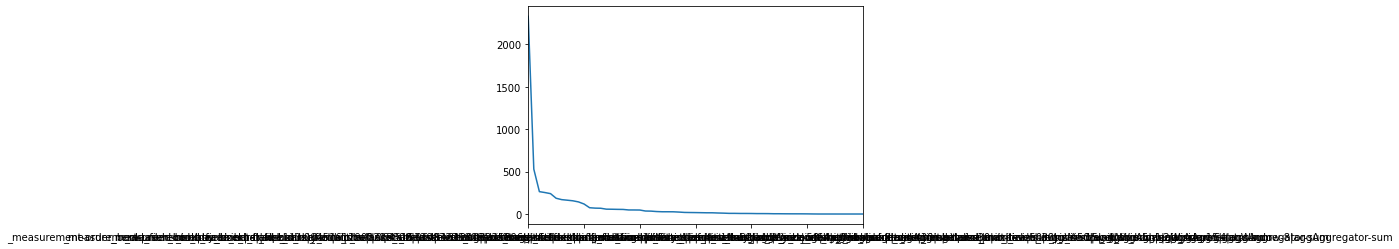

In [27]:
res.plot()

F1 Scores

In [28]:
print(res.iloc[:10])

_measurement-trade_bars|_field-imbalance_size|asset-ethusd|exchange-bitfinex|information-imbalance|unit-tick|unit_size-50|aggWindow-64|aggAggregator-sum                                                                                             2332.182485
_measurement-trade_bars|_field-imbalance_size|asset-ethusd|exchange-bitfinex|information-imbalance|unit-ethusd|unit_size-50|aggWindow-128|aggAggregator-sum                                                                                           529.424458
_measurement-order_book|_field-bid_buy_size_ratio|alpha-0.06451612903225806|asset-ethusd|exchange-bitfinex|information-bid_buy_size_ratio_imbalance_ratio_resampled_max|levels-30|unit-size_ewm_sum|unit_size-15|aggWindow-128|aggAggregator-sum      263.948117
_measurement-trade_bars|_field-imbalance_size|asset-ethusd|exchange-bitfinex|information-imbalance|unit-tick|unit_size-50|aggWindow-128|aggAggregator-sum                                                                            

VALIDATION F1

In [31]:
with open(os.path.join(Paths.trade_model, ex, 'preds.p'), 'rb') as f:
    preds = pickle.load(f)
with open(os.path.join(Paths.trade_model, ex, 'label.p'), 'rb') as f:
    label = pickle.load(f)

In [40]:
f1 = preds.merge(label, how='inner', right_index=True, left_index=True)

HOLDOUT SET VALIDATION

In [64]:
from layers.predictions.predict import Predict

In [65]:
start = datetime.datetime(2022, 2, 17)
end = datetime.datetime(2022, 3, 1)
f1_ho = Predict(boosters, start, end)

In [ ]:
# with open(os.path.join(Paths.trade_model, ex, 'f1_ho.p'), 'rb') as f:
#     f1_ho = pickle.load(f)
for i, side in enumerate(['short', 'flat', 'long']):
    print(f"{side}: {f1_score(np.where(f1_ho['label'] == i, 1, 0), f1_ho[side].round().values)}")